A) Using CNN for Handwritten Marathi Letters Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
marathi_df=pd.read_csv('/content/drive/MyDrive/TCS Datasets/Marathi Letters/marathi_char.csv')

In [ ]:
marathi_df

,label,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
0,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,character_01_ka,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,digit_9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91996,digit_9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91997,digit_9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91998,digit_9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
marathi_df.shape

(92000, 1025)

In [ ]:
train=pd.DataFrame(marathi_df)

In [ ]:
print(train.isnull().sum())

label         0
pixel_0000    0
pixel_0001    0
pixel_0002    0
pixel_0003    0
             ..
pixel_1019    0
pixel_1020    0
pixel_1021    0
pixel_1022    0
pixel_1023    0
Length: 1025, dtype: int64


In [ ]:
charlabel=train['label'].to_numpy()
del train['label']

In [ ]:
charlabel

array(['character_01_ka', 'character_01_ka', 'character_01_ka', ...,
       'digit_9', 'digit_9', 'digit_9'], dtype=object)

In [ ]:
train.to_numpy(dtype='int')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
train=np.array(train).astype('int')

In [ ]:
train.shape

(92000, 1024)

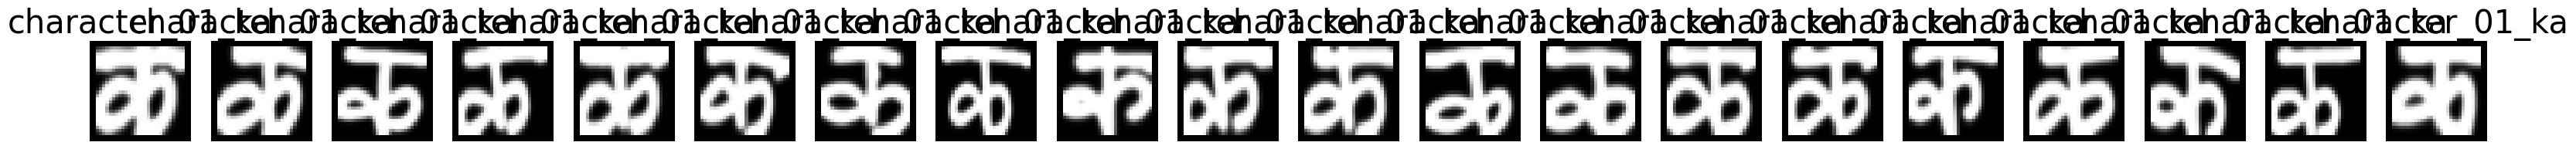

In [ ]:
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = train[i]
    label = charlabel[i]

    image = row.reshape(32,32)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
values = array(charlabel)
print(values)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['character_01_ka' 'character_01_ka' 'character_01_ka' ... 'digit_9'
 'digit_9' 'digit_9']
[ 0  0  0 ... 45 45 45]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
['character_01_ka']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train.astype("float32"),onehot_encoded,test_size=0.2,random_state=100)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((73600, 1024), (18400, 1024), (73600, 46), (18400, 46))

In [ ]:
x_train=x_train.reshape(-1,32,32,1)
x_test=x_test.reshape(-1,32,32,1)

In [ ]:
x_train.shape

(73600, 32, 32, 1)

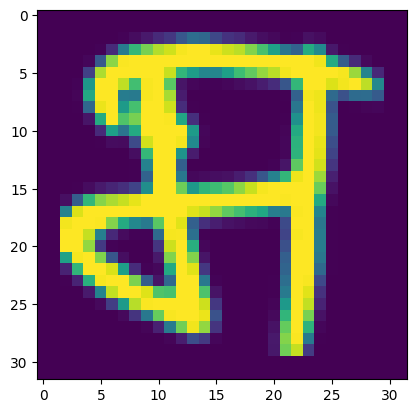

In [ ]:
plt.imshow(x_train[30])

In [ ]:
#creating convolutional model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Dropout,
    Flatten,
    BatchNormalization
)

In [ ]:
#instance of model
model=Sequential()

In [ ]:
#adding layers to model
#75 refers to filters, (3,3) - indicates size of each filter
#strides indicates movement
#padding indicates output image to remain 32x32
model.add(Conv2D(75,(3,3),strides=1,padding='same',activation='relu',input_shape=(32,32,1)))

In [ ]:
#adding batch normalization
model.add(BatchNormalization())

In [ ]:
#use max pooling
#MaxPool will divide image into 2x2 and take max value out of those
#strides indicates movement
model.add(MaxPool2D((2,2),strides=2,padding='same'))

In [ ]:
#adding convolutional layer
model.add(Conv2D(50,(3,3),strides=1,padding='same',activation='relu'))

In [ ]:
#adding dropout
model.add(Dropout(0.2))

In [ ]:
#adding batch normalization
model.add(BatchNormalization())

In [ ]:
#adding max pooling
model.add(MaxPool2D((2,2),strides=2,padding='same'))

In [ ]:
#adding convolutional layer
model.add(Conv2D(25,(3,3),strides=1,padding='same',activation='relu'))

In [ ]:
#adding batch normalization
model.add(BatchNormalization())

In [ ]:
#adding max pooling
model.add(MaxPool2D((2,2),strides=2,padding='same'))

In [ ]:
#flattening
model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=46,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 16, 16, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 50)       2

In [ ]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen=ImageDataGenerator(
    #rotation- randomly rotate images
    rotation_range=10,
    zoom_range=0.1, #zoom range
    width_shift_range=0.1, #shift images horizontally
    height_shift_range=0.1, #shift vertically
    horizontal_flip=True,
    vertical_flip=False
)

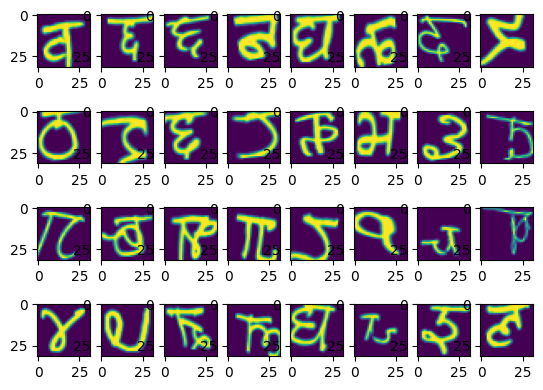

In [ ]:
#iterated images
batch_size=32
img_iter = datagen.flow(x_train,y_train,batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4,ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [ ]:
#fit the ImageDataGenerator on training data
datagen.fit(x_train)

In [ ]:
#compiling the model and loss as categorical crossentropy
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(img_iter,epochs=10,steps_per_epoch=len(x_train)/batch_size,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
2300/2300 [==============================] - 241s 104ms/step - loss: 0.9251 - accuracy: 0.7327 - val_loss: 0.2233 - val_accuracy: 0.9320
Epoch 2/10
2300/2300 [==============================] - 237s 103ms/step - loss: 0.3899 - accuracy: 0.8845 - val_loss: 0.1320 - val_accuracy: 0.9603
Epoch 3/10
2300/2300 [==============================] - 237s 103ms/step - loss: 0.3062 - accuracy: 0.9085 - val_loss: 0.1666 - val_accuracy: 0.9505
Epoch 4/10
2300/2300 [==============================] - 239s 104ms/step - loss: 0.2607 - accuracy: 0.9234 - val_loss: 0.1702 - val_accuracy: 0.9520
Epoch 5/10
2300/2300 [==============================] - 247s 107ms/step - loss: 0.2299 - accuracy: 0.9327 - val_loss: 0.1203 - val_accuracy: 0.9630
Epoch 6/10
2300/2300 [==============================] - 240s 104ms/step - loss: 0.2101 - accuracy: 0.9383 - val_loss: 0.1030 - val_accuracy: 0.9711
Epoch 7/10
2300/2300 [==============================] - 239s 104ms/step - loss: 0.1934 - accuracy: 0.9425 - val_

In [ ]:
#saving the model
model.save('/content/drive/MyDrive/Marathi Char Model')